## 기초데이터과학 (01분반)

## Programming assignment 07

### 1.NYC 온도 데이터 Dataset로 각 문제에 맞게 코드를 작성하세요.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

# 데이터 불러오기
data = pd.read_csv(url, parse_dates=["Date"])

# 데이터 확인
data.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### 1-1. 온도 변화를 확인할 수 있도록 선 그래프를 출력하세요.

In [ ]:
# 선 그래프 그리기
data_cp = data.copy()
data_cp = data_cp.sort_index(ascending=False) # 날짜 순서를 변경해주기 위해서 sort_index() 함수 사용

sns.lineplot(data=data_cp, x='Date', y='Temp')
plt.xlabel('Date')
# plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.show()

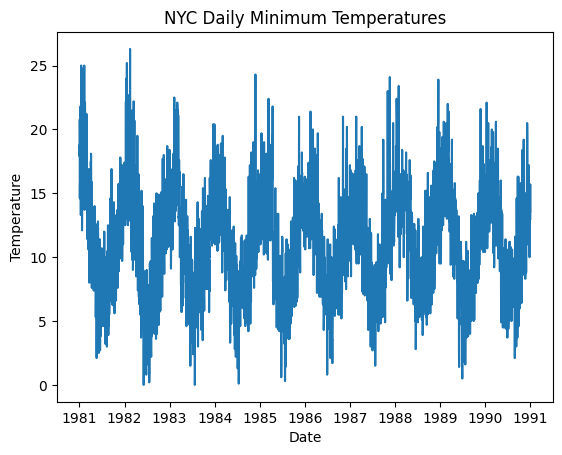

In [8]:
# 이 셀을 실행하지 마시오.

#### 1-2. 데이터셋의 가장 오래된 일과 가장 최신 일 간격을 계산하세요.

In [33]:
# 데이터셋의 기록된 시작 날과 끝나는 날 간격 계산

min_data = data_cp['Date'].min()
max_data = data_cp['Date'].max()
dif_data = (max_data-min_data).days

print(f'Start  Date:{min_data}, End date: {max_data}, Duration: {dif_data} Days')


Start  Date:1981-01-01 00:00:00, End date: 1990-12-31 00:00:00, Duration: 3651 Days


#### 1-3. '1985'년 데이터만 추출해서 그래프를 출력하세요.

In [ ]:
# 'Date' 속성을 인덱스로 설정
# data_cp_dt=data_cp.set_index('Date')
data_cp_dt = data_cp.copy()
data_cp_dt.index = data_cp['Date']
print(data_cp_dt.index)

# '1985' 데이터만 추출하여 변수에 저장
print(data_cp_dt.loc['1985'])
src_1985 = data_cp_dt.loc['1985']
# 선 그래프 출력



DatetimeIndex(['1990-12-31', '1990-12-30', '1990-12-29', '1990-12-28',
               '1990-12-27', '1990-12-26', '1990-12-25', '1990-12-24',
               '1990-12-23', '1990-12-22',
               ...
               '1981-01-10', '1981-01-09', '1981-01-08', '1981-01-07',
               '1981-01-06', '1981-01-05', '1981-01-04', '1981-01-03',
               '1981-01-02', '1981-01-01'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)
                 Date  Temp
Date                       
1985-12-31 1985-12-31  14.4
1985-12-30 1985-12-30  16.3
1985-12-29 1985-12-29  12.0
1985-12-28 1985-12-28  10.8
1985-12-27 1985-12-27  11.5
...               ...   ...
1985-01-05 1985-01-05  14.6
1985-01-04 1985-01-04  12.7
1985-01-03 1985-01-03  13.1
1985-01-02 1985-01-02  15.2
1985-01-01 1985-01-01  13.3

[365 rows x 2 columns]


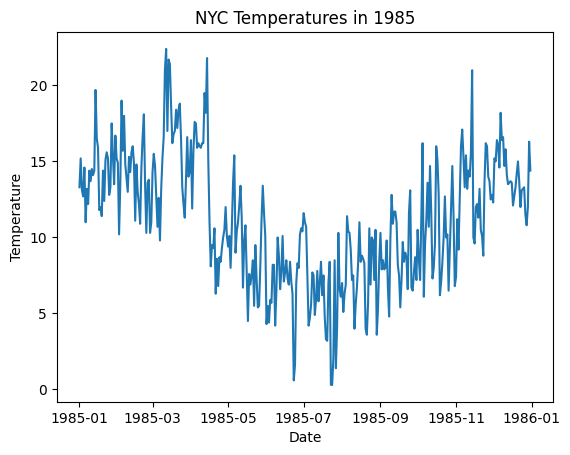

In [10]:
# 이 셀을 실행하지 마시오.

#### 1-4. 데이터셋을 월 주기(매월 말일)로 다운샘플링하여 그래프를 출력하세요.

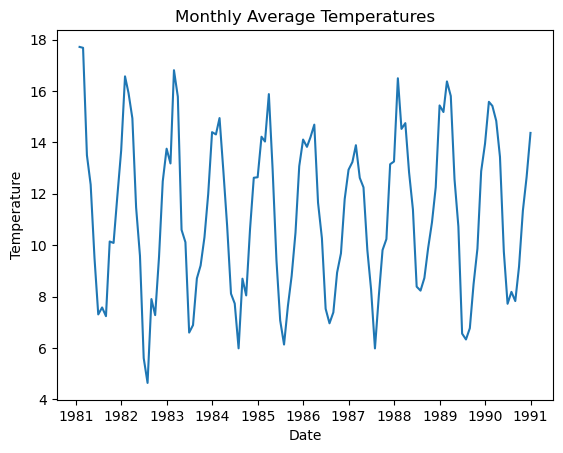

In [5]:
# 매월 말일 기준으로 평균값으로 다운샘플링


# 선 그래프 출력




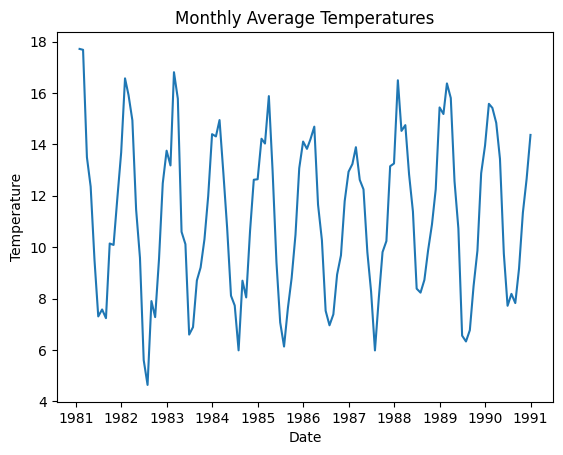

In [11]:
# 이 셀을 실행하지 마시오.

### 2. Our World in Data COVID-19 Dataset로 각 문제에 맞게 코드를 작성하세요.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url, parse_dates=["date"])

# 한국 데이터만 저장 (location 컬럼 값이 South Korea인 행만 추출)
country_data = data[data['location'] == 'South Korea']

country_data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
359238,KOR,Asia,South Korea,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,24.4,0.38,0.38,0.470636
359239,KOR,Asia,South Korea,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,NaN,NaN,NaN,NaN
359240,KOR,Asia,South Korea,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,NaN,NaN,NaN,NaN
359241,KOR,Asia,South Korea,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,NaN,NaN,NaN,NaN
359242,KOR,Asia,South Korea,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,NaN,NaN,NaN,NaN


#### 2-1. 한국의 날짜별 신규 확진자 그래프를 그리세요.

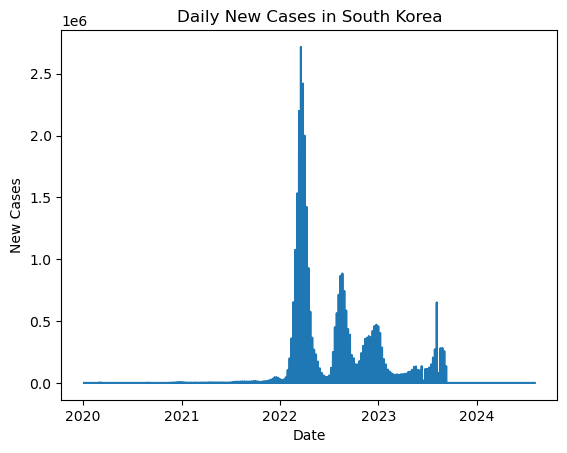

In [7]:
# 데이터셋의 'new_cases' (신규 확진자) 그래프 그리기




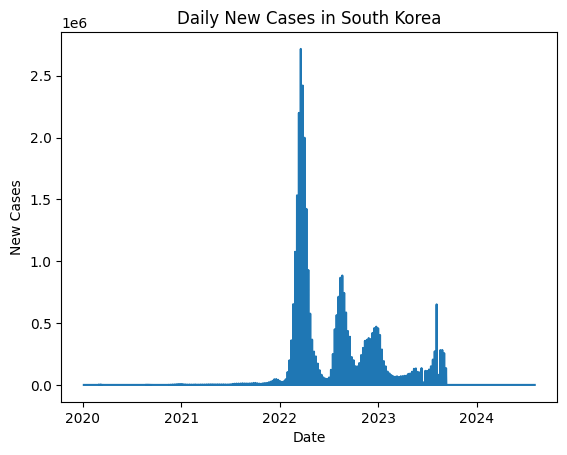

In [19]:
# 이 셀을 실행하지 마시오.

#### 2-2. 코로나 발병 365일부터 730일 사이 신규확진자 수를 계산하세요.

In [8]:
# 기준일로부터 각 date 컬럼 값 차이를 계산하여 ref_date 컬럼으로 저장


# 'ref_date' 컬럼을 인덱스로 설정


# '365 day'부터 '730 day'까지 신규 확진자 수의 합계 계산


# 결과 출력


Total cases from 365 day to 730 day : 577951.0


#### 2-3. 2022년 3월 신규 확진자 수를 그래프로 출력하세요.

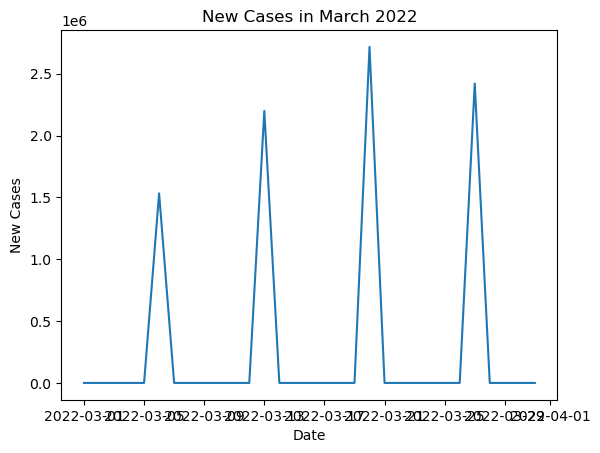

In [9]:
# date 컬럼을 인덱스로 설정하고 '2022-03' 데이터 추출


# 그래프 출력




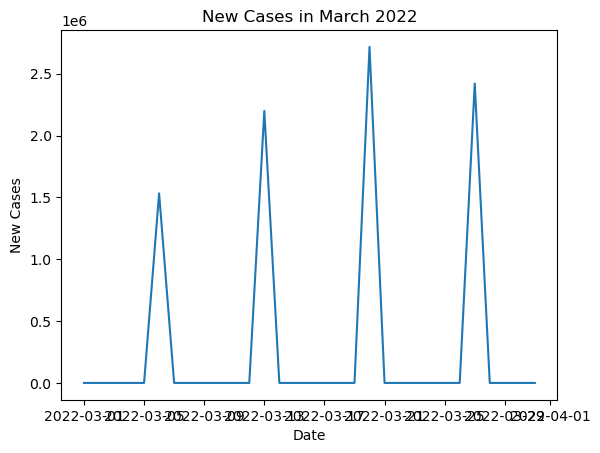

In [9]:
# 이 셀을 실행하지 마시오.

#### 2-4. 데이터셋을 주별 신규 확진자 합계로 다운샘플링하여 그래프를 출력하세요.

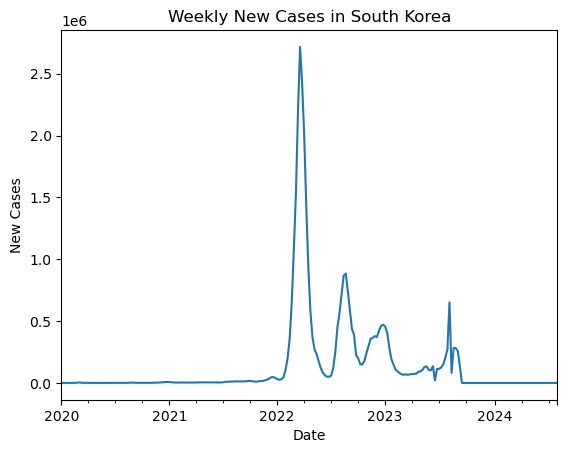

In [10]:
# 리샘플링 (주별 신규 확진자 합계)


# 그래프 출력




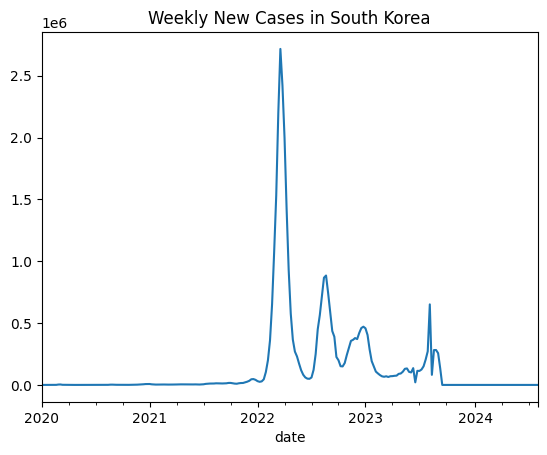

In [ ]:
# 이 셀을 실행하지 마시오.

### 3. Bitcoin Historical Dataset로 각 문제에 맞게 코드를 작성하세요.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
data = pd.read_csv(url, skiprows=1, parse_dates=["Date"])

data.head(5)

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,1732579200000,2024-11-26,BTCUSDT,93010.01,94973.37,90791.10,91965.16,57858.731380,5.370919e+09,10225809
1,1732492800000,2024-11-25,BTCUSDT,97900.05,98871.80,92600.19,93010.01,50847.450960,4.883445e+09,8289691
2,1732406400000,2024-11-24,BTCUSDT,97672.40,98564.00,95734.77,97900.04,31200.978380,3.034172e+09,4964720
3,1732320000000,2024-11-23,BTCUSDT,98892.00,98908.85,97136.00,97672.40,24757.843670,2.431610e+09,3839138
4,1732233600000,2024-11-22,BTCUSDT,98317.12,99588.01,97122.11,98892.00,46189.309243,4.555537e+09,7271311


#### 3-1. 비트 코인의 일별 종가 그래프를 그리세요.

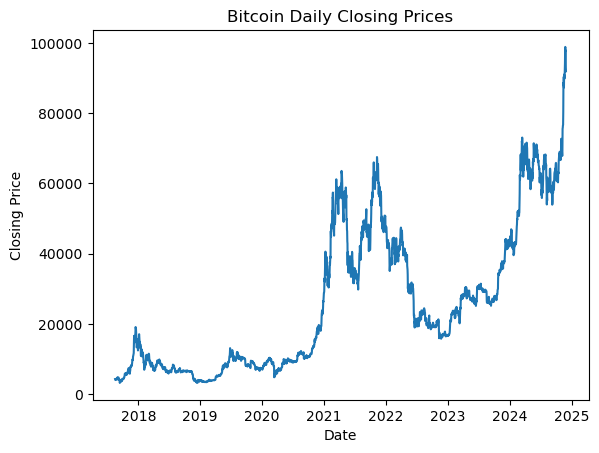

In [12]:
# 데이터셋의 'Close' (일별 종가) 속성 그래프 그리기



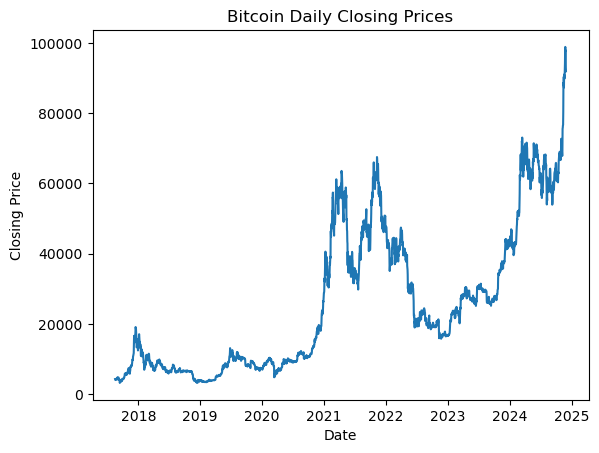

In [12]:
# 이 셀을 실행하지 마시오.

#### 3-2. 비트 코인 데이터셋에서 가장 높은 종가가 발생한 날짜를 출력하세요.

In [13]:
# 가장 높은 종가가 발생한 날짜 찾기


# 결과 출력


Highest Close Price Date: 2024-11-22 00:00:00


#### 3-3. 2022년의 일별 종가 그래프를 출력하세요.

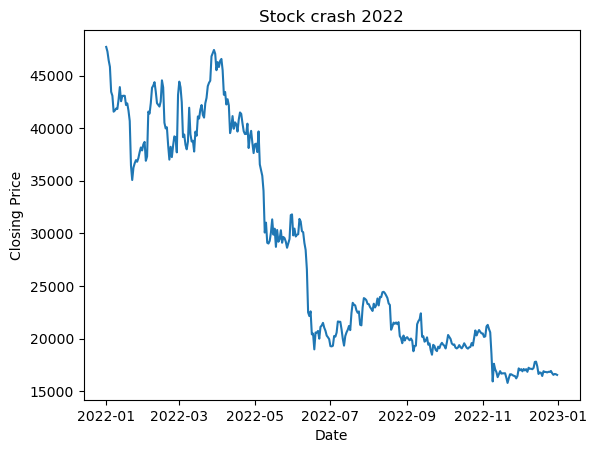

In [14]:
# 시간 인덱스를 'Date'로 설정하고 '2022' 추출


# 2022년의 'Close' (일별 종가) 그래프 출력




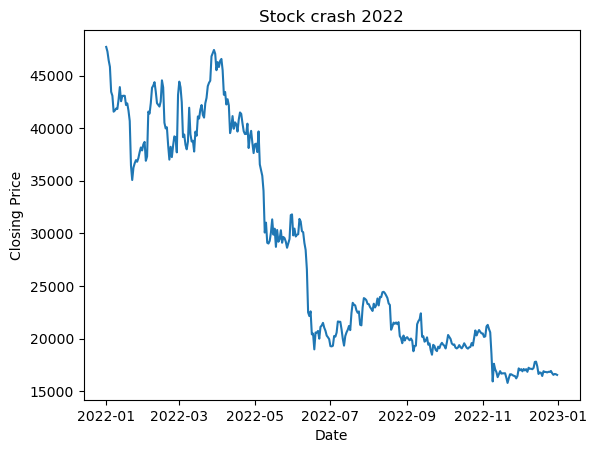

In [14]:
# 이 셀을 실행하지 마시오.

#### 3-4. 데이터셋을 월 주기(매월 1일)로 다운샘플링하여 그래프를 출력하세요.

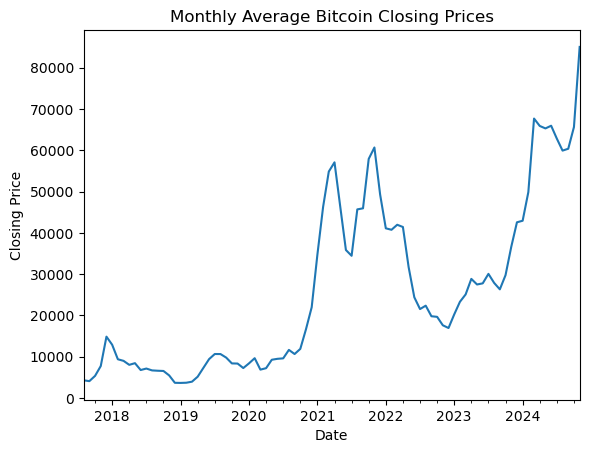

In [15]:
# 매월 1일 기준으로 평균값으로 다운샘플링


# 그래프 출력




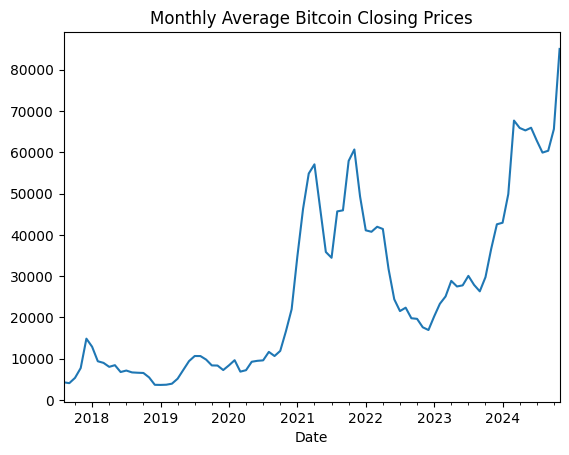

In [ ]:
# 이 셀을 실행하지 마시오.

### 4. European Central Bank Exchange Rate Dataset로 각 문제에 맞게 코드를 작성하세요.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
#url = "https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist.csv"
#data = pd.read_csv(url)

data = pd.read_csv("eurofxref-hist.csv")

data.head(5)


,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,IDR,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,2010-02-14,2.0000,1.00,2.0000,NaN,1.000,2.0000,1.0000,2.0000,1.00,...,1.50,1.600,1.70,1.8000,1.9000,2.1000,2.200,2.3000,2.400,2.5000
1,2010-02-12,5.0000,6.00,7.0000,NaN,8.000,9.0000,10.0000,11.0000,12.00,...,28.00,29.000,30.00,31.0000,32.0000,33.0000,34.000,35.0000,36.000,37.0000
2,2010-02-10,1.3740,123.01,1.9558,NaN,26.108,7.4449,15.6466,0.8798,271.55,...,12871.34,63.884,1591.64,17.9438,4.7149,1.9827,63.800,1.9483,45.576,10.5998
3,2010-02-09,1.3760,123.40,1.9558,NaN,26.099,7.4448,15.6466,0.8804,272.00,...,12878.09,64.197,1601.45,18.0645,4.7235,1.9877,63.836,1.9511,45.649,10.5992
4,2010-02-08,1.3675,122.07,1.9558,NaN,26.168,7.4442,15.6466,0.8761,273.90,...,12861.76,64.013,1602.60,18.0130,4.7063,1.9914,63.705,1.9450,45.387,10.6097


#### 4-1. 유로 달러 환율 그래프를 출력하세요.

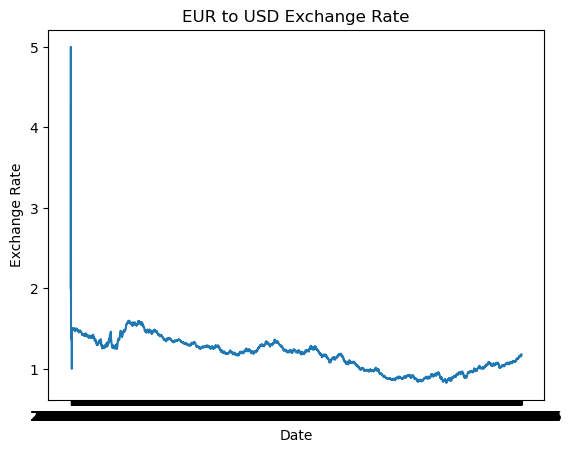

In [20]:
# 'USD' (달러) 속성에 대한 그래프 출력




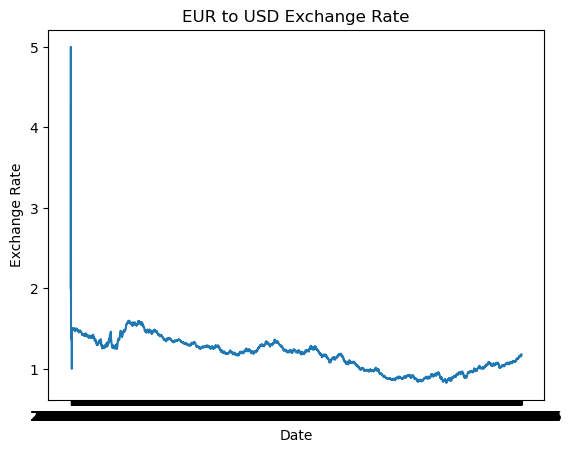

In [20]:
# 이 셀을 실행하지 마시오.

#### 4-2. 환율 데이터의 가장 오래된 날짜와 최신 날짜를 출력하고, 두 날짜 간의 시간 간격(일 수)을 계산하세요.

In [21]:
# 'Date' 속성을 datetime 객체로 변환


# 데이터셋의 기록된 시작 날과 끝나는 날 간격 계산



# 결과 출력


Start Date: 1999-01-05 00:00:00, End Date: 2010-02-14 00:00:00, Duration: 4058 days


#### 4-3. 2010년 1월의 엔화 데이터를 그래프로 출력하세요.

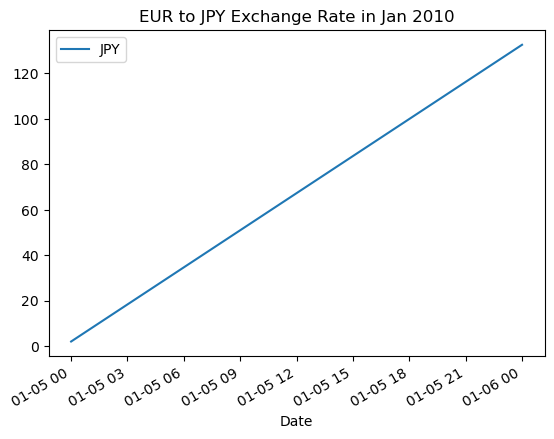

In [22]:
# Date 컬럼을 인덱스로 설정


# 2010년 1월 데이터 추출


# 'JPY' 속성에 대한 그래프 출력



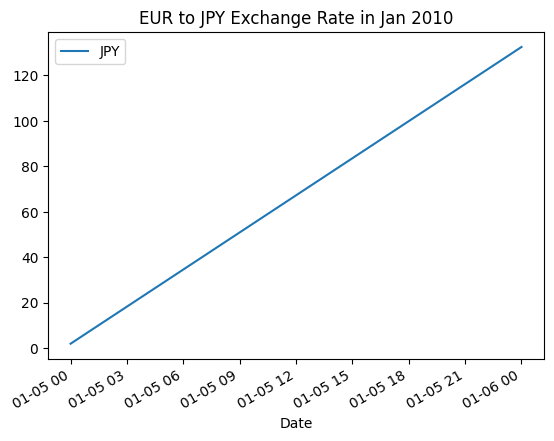

In [ ]:
# 이 셀을 실행하지 마시오.

#### 4-4. USD 컬럼의 데이터를 시간 단위로 업샘플링하고, 보간법(interpolation)을 사용하여 결측값을 채운 데이터를 그래프를 그려 시각화하세요.

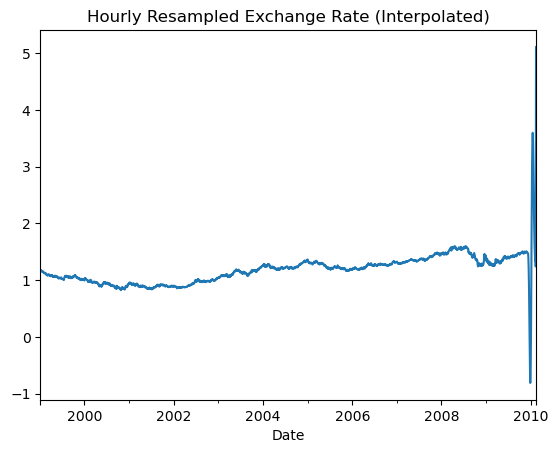

In [23]:
# 'USD' 속성에 대해 업샘플링 (시간 단위) 및 'polynomial' (다항식 보간법) 적용 (order=2)


# 그래프 출력



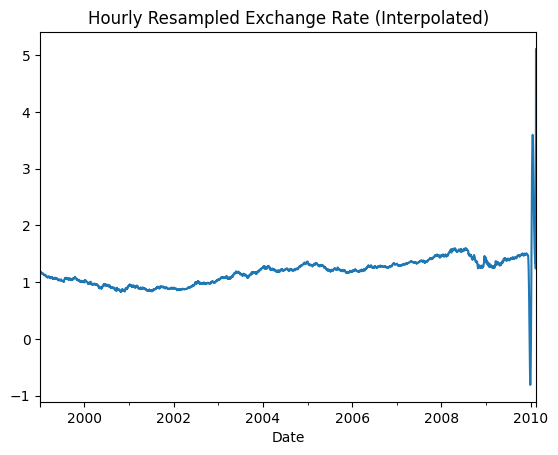

In [ ]:
# 이 셀을 실행하지 마시오.

####